# Data exploration of smoking.csv dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn asra sns
import numpy as np
train = pd.read_csv("ndom_tree_data/train_data.csv")
train.head(5)

In [ ]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
display(abs(corr["smoking"]).sort_values())

In [ ]:
def bar_chart(train_data, feature):
    smoking = train_data[train_data['smoking']==1][feature].value_counts()
    not_smoking = train_data[train_data['smoking']==0][feature].value_counts()
    df = pd.DataFrame([smoking, not_smoking])
    df.index = ['Smoking', 'Not Smoking']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

### In our data, we have about 1.74 times more men than women

In [ ]:
train["gender"].value_counts().plot(kind="pie", labels=["Male", "Female"], autopct='%.2f')

Smoking: gender
1    15687
0      689
Name: count, dtype: int64 
Not smoking: gender
0    15548
1    12629
Name: count, dtype: int64


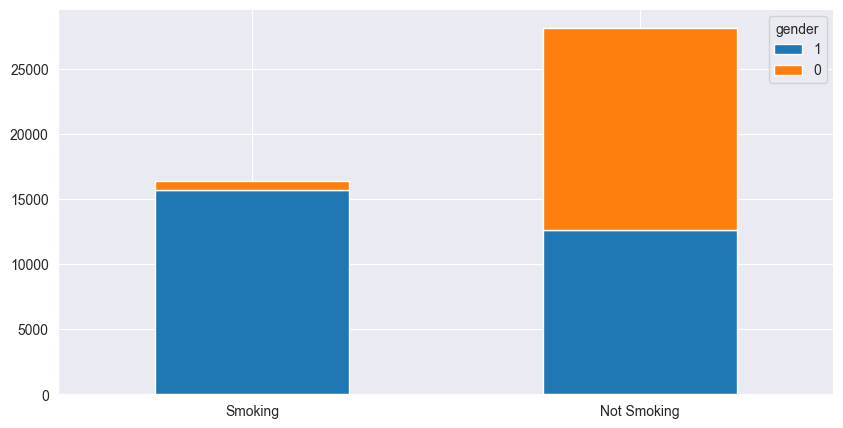

In [25]:
bar_chart(train, "gender")

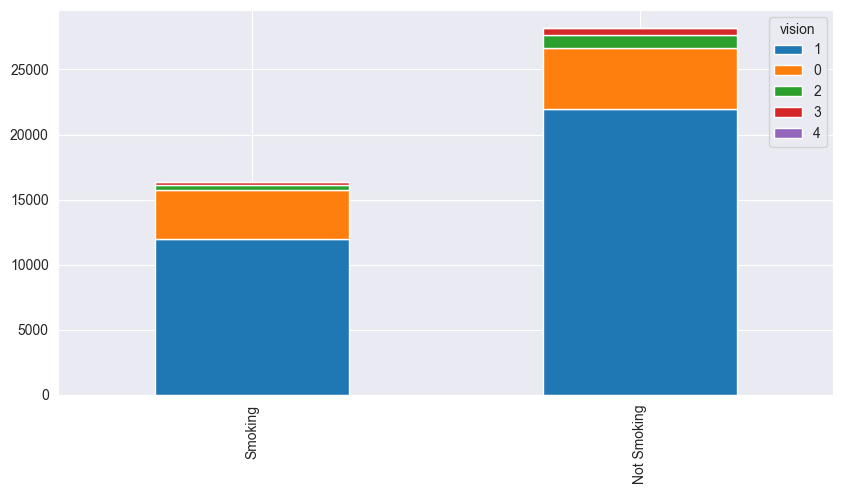

In [10]:
bar_chart(train, "vision")

### Choosing two variables with the highest correlation with target variable:

<Axes: xlabel='weight(kg)', ylabel='hemoglobin'>

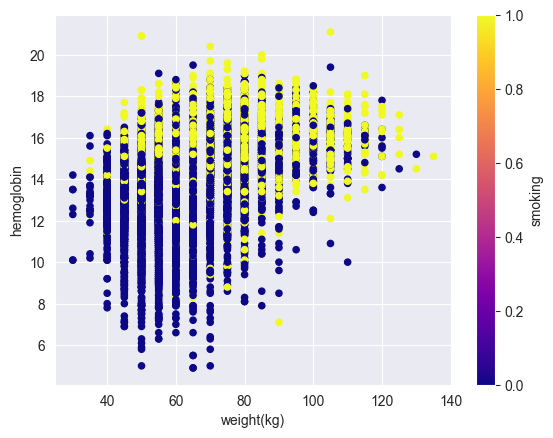

In [11]:
train.plot.scatter(x = 'weight(kg)',
                   y = 'hemoglobin',
                   c = 'smoking',
                   colormap = 'plasma')